# Clasificacion
### Funciones discriminativas

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 23 de Octubre del 2020_

En este tutorial revisaremos algunos modelos de clasificacion (binario y multiclase)..

Desde ahora en adelante utilizaremos la libreria [```scikit-learn```](https://scikit-learn.org/stable/) la cual implementa modelos de machine learning, tales como los de clasificacion. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Para aplicar los distintos algoritmos generaremos puntos aleatorios desde una distribucion normal multivariante:

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, random_state=0, cluster_std=0.80)

In [3]:
def plot_prediction(inputs, labels, ax, title=''):
    X_1 = inputs[labels==0] # Objetos filtrados con clase 0 
    X_2 = inputs[labels==1] # Objetos filtrados con clase 1
    X_3 = inputs[labels==2] # Objetos filtrados con clase 2
    
    # Graficamos la primera y segunda dimension sobre el eje x e y respectivamente
    ax.scatter(X_1[:, 0], X_1[:, 1], s=30, alpha=0.7, label='clase 1', color='darkblue')
    ax.scatter(X_2[:, 0], X_2[:, 1], s=30, alpha=0.7, label='clase 2', color='darkgreen')
    ax.scatter(X_3[:, 0], X_3[:, 1], s=30, alpha=0.7, label='clase 3', color='darkred')
    ax.legend(loc='lower left')
    ax.set_title(title)
    ax.grid()
    return ax

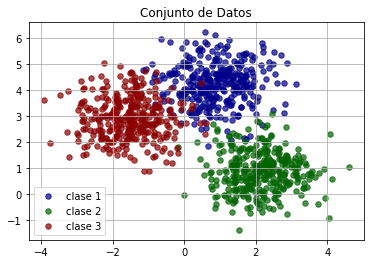

In [4]:
fig, ax = plt.subplots(1,1)
ax = plot_prediction(X, y, ax, title='Conjunto de Datos')
plt.show()

El problema de clasificacion consistira en **etiquetar automaticamente** muestras **no observadas** utilizando alguno de estos dos enfoques:
- <u>Modelos Generativos</u>: Determinar la densidad condicionada a cada clase $p(\boldsymbol{x}|C_k)$, donde $C_k$ es la clase y $P(C_k)$ es la probabilidad a priori. Este enfoque utiliza **la probabilidad conjunta** (implicita o explicitamente)
- <u>Modelos Discriminativos</u>:
    - Inferir directamente **el posterior** de la clase $p(C_k|\boldsymbol{x})$ y luego asignar nuevas observaciones a la clase mas apropiada.
    - Aprender una funcion $f(\boldsymbol{x})$, llamada **funcion discriminativa**. la cual mapea las muestras $\boldsymbol{x} \rightarrow C_k$, con $k=0...,K-1$ al espacio de $K$ estiquetas. En este enfoque no utilizamos la probabilidad.  

## Conjuntos de entranamiento y prueba 

Primero que todo debemos dividir el conjunto de datos para **entrenar** y **evaluar** nuestro modelo. Tipicamente, la evaluacion del modelo se realiza al final del entrenamiento. A este conjunto le llamamos **testing set**. Por otro lado, si queremos ver como esta **generalizando** nuestro modelo durante el entrenamiento debemos utilizar un  **conjunto de validacion**. El uso de un conjunto de validacion dependera del modelo a utilizar.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este caso **solo utilizaremos el testing set**

## Naive Bayes
El clasificador Naive Bayes:
    \begin{eqnarray}
        p(C_k|\boldsymbol{x}) & = & \frac{p(\boldsymbol{x}|C_k)p(C_k)}{p(\boldsymbol{x})}\\
        & = & \frac{p(\boldsymbol{x}, C_k)}{\sum_kp(\boldsymbol{x}|C_k)p(C_k))}
    \end{eqnarray}
donde $\boldsymbol{x}$ es el input y $C_k$ la etiqueta de clase. Note que $p(\boldsymbol{x}|C_k)$ y $P(C_k)$ pueden ser extraidas desde el **conjunto de entrenamiento**

Dado que asumimos $\boldsymbol{x}$ una variable independiente entonces:
    \begin{eqnarray}
        p(C_k|\boldsymbol{x}) & \propto & p(C_k)\prod_{i=0}^{N-1}p(x_i|C_k)
    \end{eqnarray}
Una nueva inferencia consiste en encontrar el maximo a posteriori o MAP cuya forma viene dado por:
    \begin{eqnarray}
        \hat{y} = arg\max_{C_k} \left( p(C_k)\prod_{i=0}^{N-1} p(x_i|C_k) \right )
    \end{eqnarray}
con $k= 0,...N-1$ numero de clases e $\hat{y}$ es el vector de etiquetas 

In [9]:
from sklearn.naive_bayes import GaussianNB

En ```scikit-learn``` esta implementado el clasificador **Gaussian Naive Bayes**, el cual asume que la probabilidad de las muestras sigue una distribucion gausiana:
\begin{eqnarray}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
\end{eqnarray}

In [10]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)

In [12]:
y_hat_gnb = clf.predict(X_test)

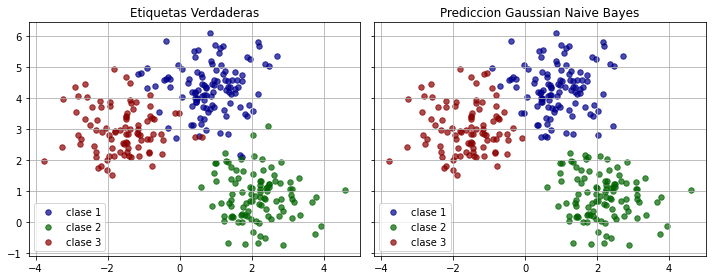

In [13]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax0 = plot_prediction(X_test, y_test, axes[0], title='Etiquetas Verdaderas')
ax1 = plot_prediction(X_test, y_hat_gnb, axes[1], title='Prediccion Gaussian Naive Bayes')
fig.tight_layout()
plt.show()

En este tutorial solo veremos Naive Bayes. Sin embargo existen otros modelos generativos, tales como:
- Redes Bayesianas
- Campo aleatorio de Markov
- Modelo oculto de Márkov
- Autoencoder Variacional

## K-vecinos mas cercanos (k-NN)

 Los vecinos mas cercanos es una tecnica ampliamente utilizada ya que resulta muy facil e intuitiva. El algoritmo consiste en:
```
0 |- Desde i=0 hasta N-1 muestras:
1 |   d = calcular distancia entre x_i y x
2 |   guardar distancia d
3 |- Fin del ciclo
4 |
5 |- Ordenar las distancias de menor a mayor
6 |- Extraer los primeros k indices 
7 |
8 |- Retornar la clase mas repetida en la vecindad

```

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=100)
clf = clf.fit(X_train, y_train)

In [16]:
y_hat_knn = clf.predict(X_test)

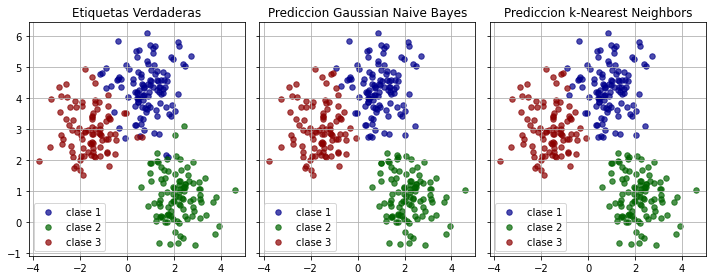

In [17]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax0 = plot_prediction(X_test, y_test, axes[0], title='Etiquetas Verdaderas')
ax1 = plot_prediction(X_test, y_hat_gnb, axes[1], title='Prediccion Gaussian Naive Bayes')
ax2 = plot_prediction(X_test, y_hat_knn, axes[2], title='Prediccion k-Nearest Neighbors')
fig.tight_layout()
plt.show()

## Support Vector Machine

En este algoritmo buscamos optimizar un **hiperplano** que **maximice la distancia** de los **puntos mas cercanos de cada clase**.
\begin{equation} H = \{ x_0, x_2, ..., x_{N-1}\} | \sum_{i=0}^{N-1} a_i x_i = c\end{equation}
Para ilustrar el funcionamiento del algoritmo utilizaremos $N = 2$ dimensiones.

Ademas consideraremos **2 clases** desde el conjunto $X \sim \mathcal{N}(\boldsymbol{\mu}, \sum)$. El problema de optimizacion a resolver consistira en **maximizar el ancho** entre los **puntos mas cercanos al hiperplano** cuya **clase sea distinta**
<img src = "img/svm_0.png" width=400/>

Maximizar el ancho con respecto al hiperplano nos permitira separar las muestras. Ahora, la pregunta es: **¿Como encuentro el hiperplano?**

## Derivando el limite de decision

Asumamos que tenemos un vector $\vec{w} \perp H$
<img src = "img/svm_1.png" width=450/>

Asumamos que tenemos un vector $\vec{w} \perp \vec{b}$ (vector normal) y un vector $\vec{x}$ apuntando hacia algun objeto. Si proyectamos el vector $\vec{x}$ sobre $\vec{w}$:
\begin{equation} \vec{w}\cdot\vec{x} = c\end{equation}
donde $c$ en este caso es algun escalar.

Haciendo c = -b:
\begin{equation} \vec{w}\cdot\vec{x} + b = 0\end{equation} 
Lo cual quiere decir que $\vec{x}$ y $\vec{w}$ son perpendiculares. En otras palabras la proyeccion del vector $\vec{x}$ cae sobre el hiperplano $H$.

La clase de $\vec{x}$ estara condicionada por la siguiente funcion:
\begin{equation}
y_i = 
     \begin{cases}
       \text{verde,} &\quad \text{si} \ \vec{x} \cdot \vec{w} + b \geq 0 \\
       \text{azul,}  &\quad  \text{si} \ \vec{x} \cdot \vec{w} + b < 0 \\
     \end{cases}  
\end{equation}
Alejandonos del limite de decision podemos decir que
\begin{eqnarray}
\vec{w}\cdot\vec{x_{verde}} \geq 1 \\
\vec{w}\cdot\vec{x_{azul}} \leq -1
\end{eqnarray}

<img src = "img/svm_2.png" width=400/>




Utilizando el valor de las etiquetas a nuestro favor, consideremos:
<center>
\begin{eqnarray}
\hat{y} = 
     \begin{cases}
       \text{1,} &\quad& \text{para muestras azules} \\
       \text{-1,} &\quad& \text{para muestras verdes} \\
     \end{cases}  
\end{eqnarray}
</center>
Ahora la condicion es la misma para ambos casos
\begin{eqnarray}
y_i(\vec{w} \cdot \vec{x_i} + b) \geq 1 \equiv y_i(\vec{w} \cdot \vec{x_i} + b) -1 \geq 0
\end{eqnarray}

y diremos que $y_i(\vec{w} \cdot \vec{x_i} + b) -1 = 0$ para todos los **puntos** que esten en el **limite de decision**.

## Determinando el ancho optimo

Diremos que el ancho estara determinado por la distancia entre los puntos de distintas clases:
\begin{eqnarray}
ancho = (\vec{x_{azul}} - \vec{x_{verde}})\cdot \frac{\vec{w}}{||\vec{w}||}\\
ancho = \frac{(\vec{x}_{azul}\cdot\vec{w}) - (\vec{x}_{verde}\cdot\vec{w})}{||\vec{w}||}
\end{eqnarray}

<img src = "img/svm_3.png" width=400/>

De la seccion anterior sabemos que
\begin{equation}
\vec{w}\cdot\vec{x}_{azul} = 1-b \\
\vec{w}\cdot\vec{x}_{verde} = 1+b  
\end{equation}

Luego,
\begin{equation}
ancho = \frac{2}{||\vec{w}||}
\end{equation}

## Problema de Optimizacion

\begin{equation}
\text{min} \frac{1}{2}||w||\ \text{sujeto a} \  y_i(\vec{w} \cdot \vec{x_i} + b) \geq 1
\end{equation}

## SVM en Python

In [19]:
from sklearn import svm # Import Support Vector Machine from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
try:
    from mlxtend.plotting import plot_decision_regions
except:
    !pip install mlxtend

In [20]:
model = svm.SVC(kernel='linear') 
model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_hat_svm = model.predict(X_test)

En nuestro ejemplo tenemos tres clases. La unica diferencia con la demostracion anterior es la cantidad de limites de decision a optimizar

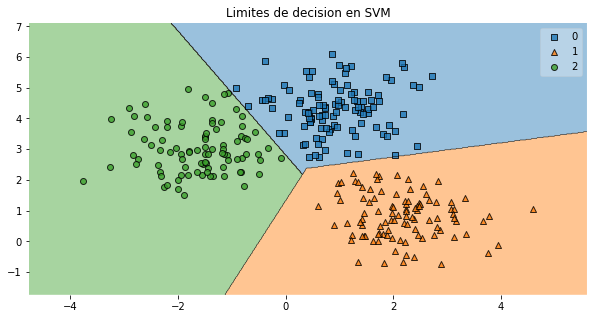

In [22]:

plt.figure(figsize=(10,5))
plot_decision_regions(X=X_test, 
                      y=y_hat_svm,
                      clf=model, 
                      legend=1)
plt.title('Limites de decision en SVM')
plt.show()

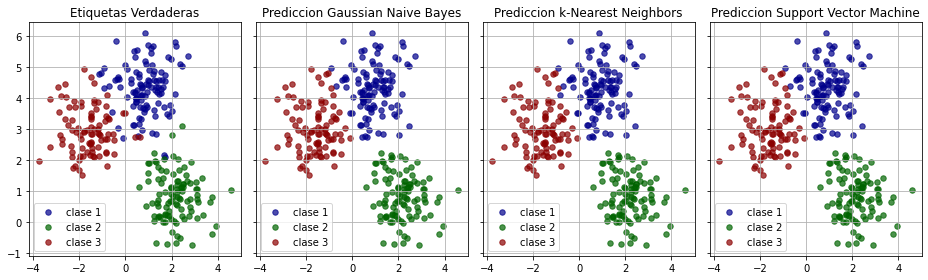

In [23]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=(13,4))
ax0 = plot_prediction(X_test, y_test, axes[0], title='Etiquetas Verdaderas')
ax1 = plot_prediction(X_test, y_hat_gnb, axes[1], title='Prediccion Gaussian Naive Bayes')
ax2 = plot_prediction(X_test, y_hat_knn, axes[2], title='Prediccion k-Nearest Neighbors')
ax3 = plot_prediction(X_test, y_hat_svm, axes[3], title='Prediccion Support Vector Machine')
fig.tight_layout()
plt.show()

## El truco del Kernel en SVM

Una de las principales limitaciones de los SVM es que solo funcionan con clases **linealmente separables**. 

Para resolver esto podemos hacer una **transformacion** del espacio original (tipicamente de mayor dimensionalidad) donde **asumimos** que los puntos seran linealmente separables.

<img  height="450" width="450" src="./img/kernel.JPG">

[```Scikit-learn```](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc) nos permite utilizar distintos kernels:
<img  height="550" width="550" src="./img/kernels_scikit.png">

Para ilustrar mejor este caso, utilizaremos otro conjunto de datos cuya distribucion  no permita separar linealmente las clases

/home/cridonoso/.conda/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


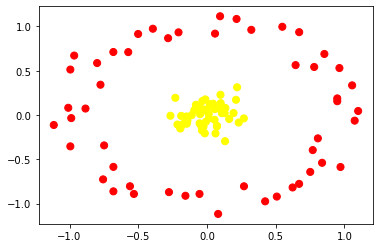

In [24]:
from sklearn.datasets.samples_generator import make_circles
Xnl, ynl = make_circles(100, factor=.1, noise=.1)

plt.scatter(Xnl[:, 0], Xnl[:, 1], c=ynl, s=50, cmap='autumn')
plt.show()

Ahora entrenamos nuestro ```SVM``` utilizando [Radial Basis Funcion](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) kernel (```'rbf'```)

In [25]:
clf = svm.SVC(kernel='rbf').fit(Xnl, ynl)

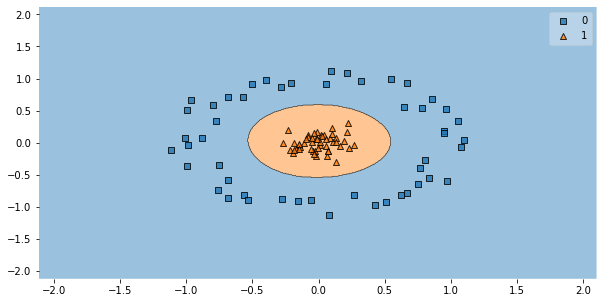

In [26]:
plt.figure(figsize=(10,5))
plot_decision_regions(X=Xnl, 
                      y=ynl,
                      clf=clf, 
                      legend=1)
plt.show()

# Arboles de Decision

Otra forma de hacer clasficacion discriminativa es utilizar **arboles de decision**. 

Este algoritmo consiste de nodos y aristas. Los **nodos** representan las condiciones $t_i$ de separacion de los datos.

En cada separacion crearemos regiones $R_i$ que contiene un subconjunto de los datos.

Cada region $R_i$ aportara informacion en el proceso discriminativo

El proceso se repite recursivamente hasta que se cumpla algun criterio de detencion. 

Las **aristas** determinan el camino hacia los nodos hoja (o Regiones finales de separacion), tipicamente represetan la clasficacion final.

<img  height="650" width="750" src="./img/dt_0.png">

*fuente imagen: (Machine Learning: A probabilistic Perspective, Murphy et al. 2012, pag 545)*

De la imagen anterior podemos decir que: 
\begin{eqnarray}
s(j, t) = (\{\boldsymbol{x} | x_j < t, x_j \in\mathbb{R}\})
\end{eqnarray}

donde $s$ representa un corte (del ingles split), $\boldsymbol{x}$ es el vector de entrada y $x_j$ la $j$-esima dimension de este. 

Las regiones seran entonces un conjunto ordenado de **cortes**

### Como podemos definir las condiciones de corte ?
El **objetivo es separar de mejor manera el espacio de entrada**. 

Para ello debemos utilizar una **funcion de perdida** $\mathcal{L}(R)$ que mida la efectividad de la region $R$.

Por ejemplo en un problema de clasificacion nos gustaria que las regiones agruparan elementos de una misma clase.

Definiendo $p_i$ como la porcion de muestras que estan en la clase $c \in C$

\begin{equation}
\mathcal{L} = 1 - \max_c p_c
\end{equation}

Notemos que cuando $p_c$ es maximo la perdida es 0. Esta funcion de perdida es conocida como **missclassification error**. Sin embargo, esta funcion no considera los casos positivos de cada corte.

En cambio, podemos utilizar la **entropia** entre clases (entropia cruzada) 

\begin{equation}
\mathcal{L} = -\sum_c p_c\log(p_c)
\end{equation}

Esta funcion viene desde **teoria de la informacion** y nos dice la cantidad de informacion que ganamos desde un determinado suceso.

Por ejemplo si sabemos con un 100% que algo ocurrira entonces $p_c = 1$ y $\sum_c p_c\log(p_c) = 0$. En otras palabras saber con exactitud que algo ocurrira no nos aporta mucha informacion del proceso infrencial, pues ya sabemos ocurrira.

En terminos generales, podemos medir cuanta informacion ganamos utilizando la metrica:
\begin{equation}
IG(x|R) = L(R_0) - \sum_i \frac{N_i}{N}L(R_i)
\end{equation}

<img  height="650" width="550" src="./img/dt_1.png">

## Arboles de Decision en ScikitLearn

In [8]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
df   = pd.DataFrame(iris.data, columns=iris.feature_names)
y    = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [6]:
# Training
clf = DecisionTreeClassifier()
clf = clf.fit(df,y)

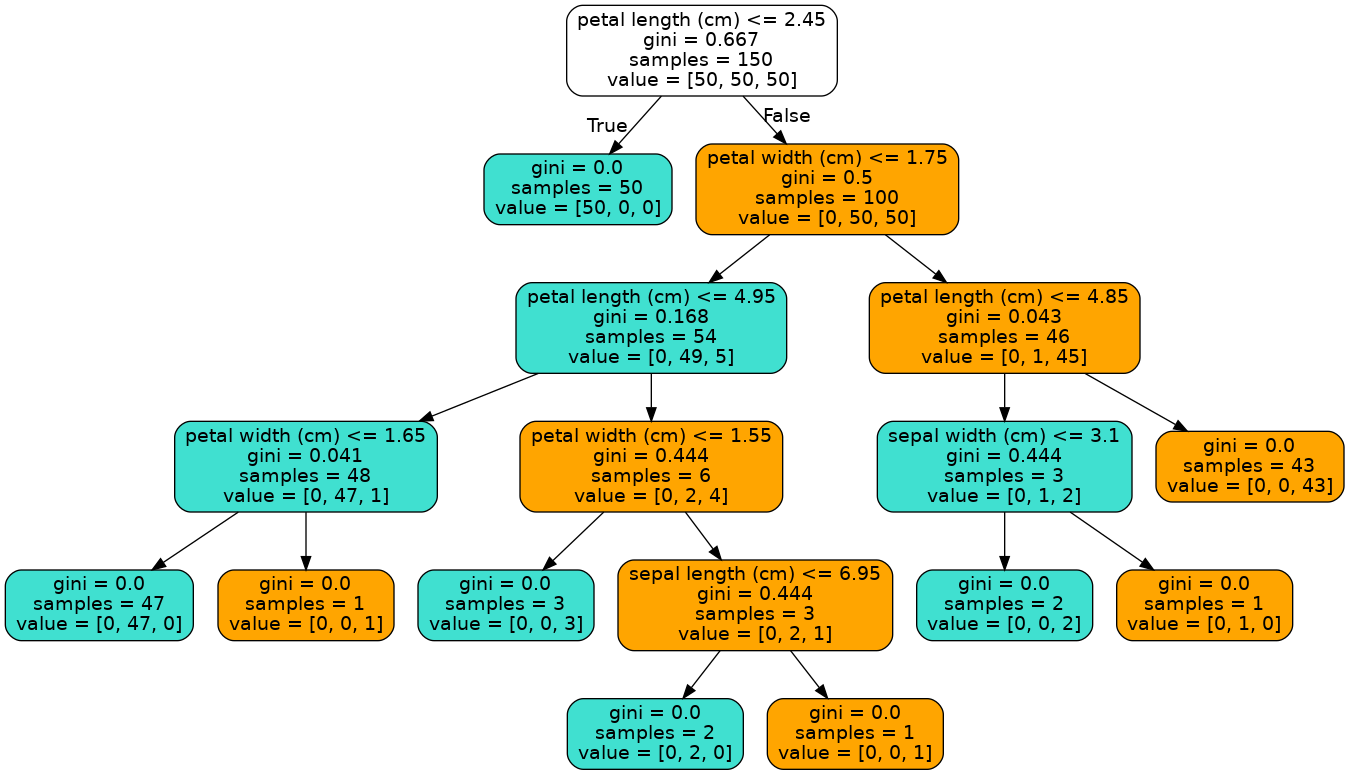

In [32]:
try:
    import pydotplus
except:
    !pip install pydotplus
    !pip install graphviz
    import pydotplus
    
import collections
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
    
    
try:
    # Visualize data
    dot_data = export_graphviz(clf,
                               feature_names=iris.feature_names,
                               out_file=None,
                               filled=True,
                               rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    viewPydot(graph)
except:
    pass

Otra forma de mostrar el árbol generado es utilizando la función **plot_tree** (se debe importar tree de scikit-learn)

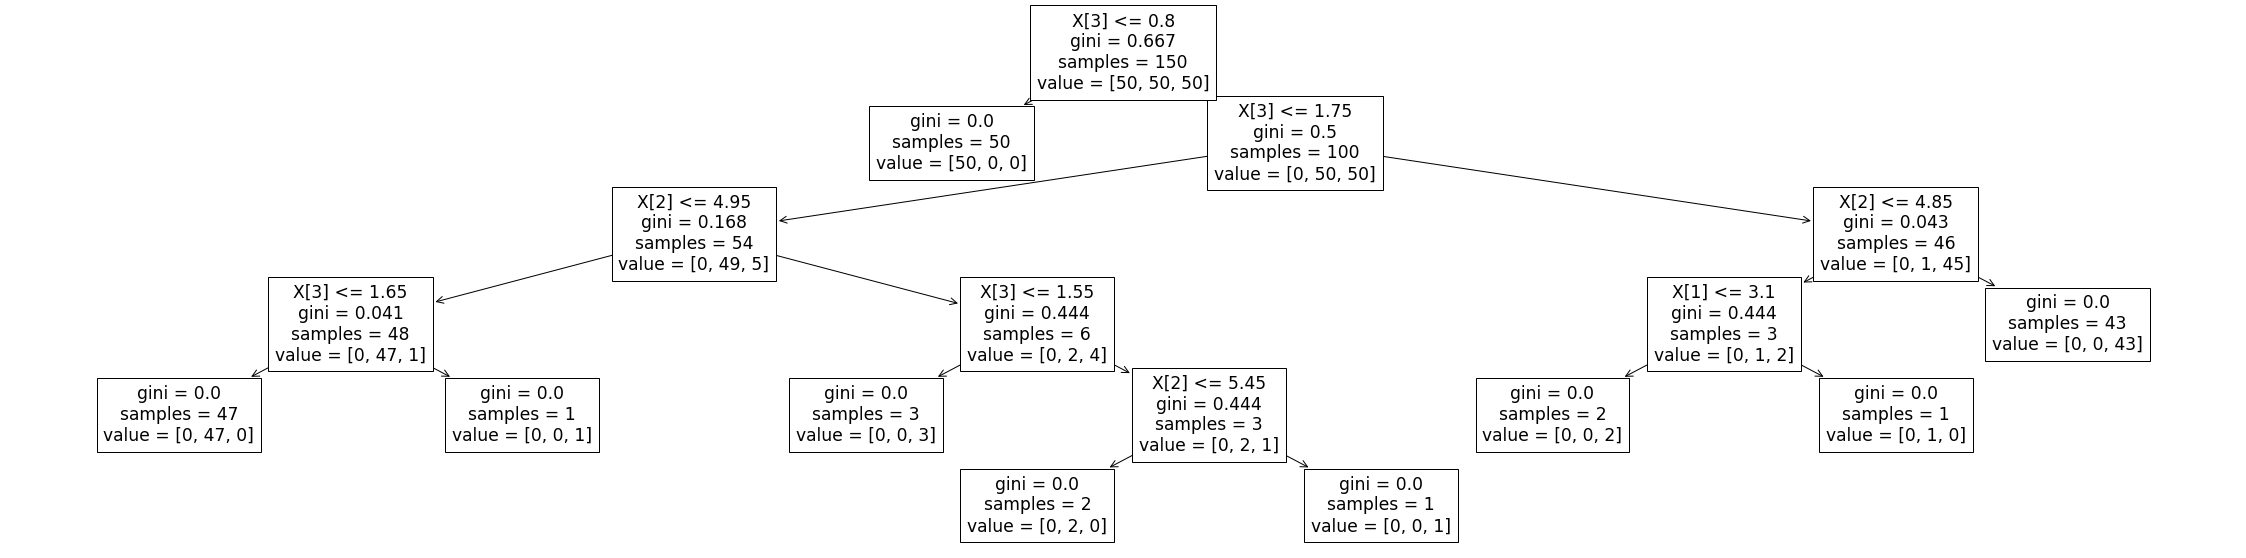

In [10]:
from sklearn import tree

plt.figure(figsize=(40,10))
tree.plot_tree(clf);

<!-- <img  height="450" width="450" src="./img/dt_ex.png"> -->

## Random Forest

* Consiste en utilizar N arboles de decision
* Por cada arbol:
 * Seleccionamos $m$ atributos de manera aleatoria (con reemplazo)
 * Entrenamos usando los $m$ atributos  para dividir cada nodo
* $f(x) = \frac{1}{N}\sum_{i=1}^n f_i(x)$, donde $f_i(x)$ es la etiqueta estimada por el $i$-esimo arbol.

In [33]:
from util import visualize_classifier
from sklearn.ensemble import RandomForestClassifier

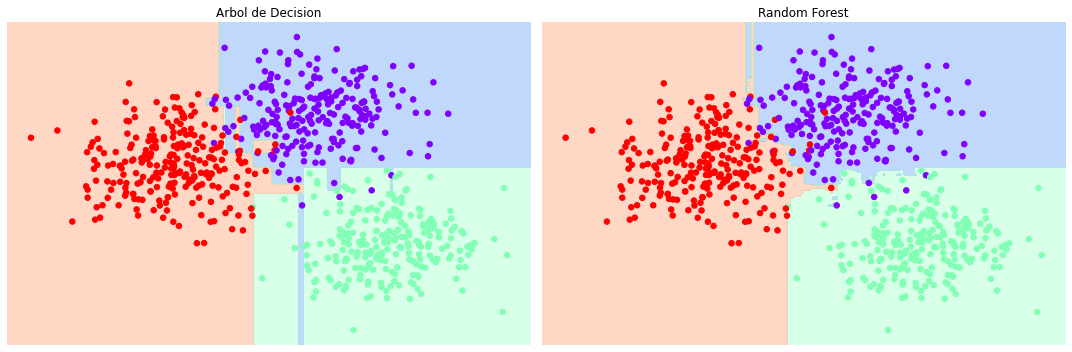

In [30]:
try:
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    visualize_classifier(DecisionTreeClassifier(), X_train, y_train, ax=axes[0])
    axes[0].set_title('Arbol de Decision')
    
    clf = RandomForestClassifier(n_estimators=200, random_state=0)
    
    visualize_classifier(clf, X_train, y_train, ax=axes[1])    
    axes[1].set_title('Random Forest')
    fig.tight_layout()
    plt.savefig('img/dt_2.png', format='png')
    plt.show()
except:
    pass

<!-- <img  height="650" width="850" src="./img/dt_2.png"> -->

# Comparando modelos 

En clasificacion solemos utilizar **Accuracy** (exactitud) para evaluar el clasificador. Esta metrica consiste en:

\begin{eqnarray}
\text{Accuracy} = \frac{\text{Casos Positivos}}{\text{Casos Totales}}
\end{eqnarray}

Sin embargo, esta metrica es invariante a conjuntos de datos desbalanceados, para ello podemos utilizar **Balanced Accuracy** (exactitud balanceada):

\begin{eqnarray}
\text{Balanced Accuracy} = \frac{1}{K}\sum_k^K \frac{\text{Casos Positivos}_k}{\text{Casos Totales}_k}
\end{eqnarray}
donde $K$ es el numero de clases

Otra metrica ampliamente utilizada en Clasificacion es el **F1 score** el cual es una media harmonica entre **Precision** y **Recall**
\begin{eqnarray}
    \textrm{F1} & = &\frac{1}{K} \sum_{k=0}^{K-1} 2 \times \frac{\textrm{Precision}_k \times \textrm{Recall}_k}{\textrm{Precision}_k + \textrm{Recall}_k}
    \nonumber
\end{eqnarray}
donde,
\begin{eqnarray}
    \textrm{Recall}_k & = &  \frac{\textrm{True Positives}_k}{\textrm{True Positives}_k + \textrm{False Negatives}_k}
    \nonumber\\
    \textrm{Precision}_k & = &   \frac{\textrm{True Positives}_k}{\textrm{True Positives}_k + \textrm{False Positives}_k}.
    \nonumber
\end{eqnarray}

Intuitivamente, el **Precision** determina cuantos de nuestras predicciones son correctas  mientras que el **Recall** indica el numero de etiquetas verdaderas que fueron correctamente identificadas por el clasificador.


#### ¿Que significa True Positive, True Negative, False Positive, False Negative ?

Pensemos en un modelo que solo nos indique si un pokemón es de tipo Agua o no.

Si tengo una entrada X y se que es de tipo Agua puede suceder:
* El modelo predijo que era de tipo Agua  -> **True Positive**
* El modelo predijo que no era de tipo Agua -> **False Negative**

Si tengo una entrada X' y no es de tipo Agua puede suceder:
* El modelo predijo que era de tipo Agua -> **False Positive**
* El modelo predijo que no era de tipo Agua -> **True Negative**


[`Scikit-learn`](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#classification-metrics) ya tiene implementado todas estas metricas

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Diferencias entre micro, macro y weighted (Como tener en cuenta el desbalanceo de clases) 


* 'micro':
Se calcula contando globalmente el total de verdaderos positivos, falsos negativos y falsos positivos.

* 'macro':
Calcula la métrica para cada etiqueta y encuentra su media. Esto no tiene en cuenta el desequilibrio de etiquetas.

* 'weighted':
Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (el número de instancias reales para cada etiqueta). Esto altera "macro" para tener en cuenta el desequilibrio de etiquetas

Fuente: scikit-learn

A modo de resumen utilizaremos evaluaremos todos los modelos vistos en este tutorial

In [35]:
clf_gnb = GaussianNB()
clf_gnb = clf_gnb.fit(X_train, y_train)
y_hat_gnb = clf_gnb.predict(X_test)

clf_knn = KNeighborsClassifier(n_neighbors=100)
clf_knn = clf_knn.fit(X_train, y_train)
y_hat_knn = clf_knn.predict(X_test)

clf_svm = svm.SVC(kernel='rbf') 
clf_svm = clf_svm.fit(X_train, y_train)
y_hat_svm = clf_svm.predict(X_test)

clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train,y_train)
y_hat_dt = clf_dt.predict(X_test)

cld_rf = RandomForestClassifier(n_estimators=200, random_state=0)
cld_rf = cld_rf.fit(X_train,y_train)
y_hat_rf = cld_rf.predict(X_test)

In [36]:


acc_list = []
bacc_list = []
pre_list = []
reca_list = []
f1_list = []
for pred in [y_hat_gnb, y_hat_knn, y_hat_svm, y_hat_dt, y_hat_rf]:
    acc_list.append(accuracy_score(y_test, pred))
    bacc_list.append(balanced_accuracy_score(y_test, pred))
    pre_list.append(precision_score(y_test, pred, average='macro'))
    reca_list.append(recall_score(y_test, pred, average='macro'))
    f1_list.append(f1_score(y_test, pred, average='macro'))

metrics = pd.DataFrame()
models = ['Gaussian Naive Bayes', "kNN", "SVM", "Decision Tree", "Random Forest"]

metrics['Model'] = models
metrics['ACC'] = acc_list
metrics['BACC'] = bacc_list
metrics['Precision'] = pre_list
metrics['Recall'] = reca_list
metrics['F1'] = f1_list

metrics.sort_values('F1', ascending=False)

,Model,ACC,BACC,Precision,Recall,F1
0,Gaussian Naive Bayes,0.953333,0.954120,0.952969,0.954120,0.953479
1,kNN,0.953333,0.954120,0.952969,0.954120,0.953479
2,SVM,0.953333,0.954120,0.952969,0.954120,0.953479
4,Random Forest,0.953333,0.954362,0.952501,0.954362,0.953231
3,Decision Tree,0.950000,0.952595,0.949363,0.952595,0.949933


Finalmente, una matriz de confusion nos permite observar con detalle el desempeno de nuestro clasificador

In [42]:
from sklearn.metrics import plot_confusion_matrix

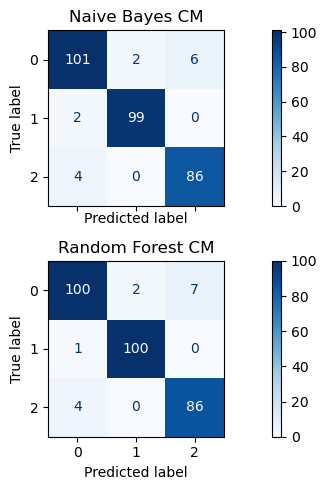

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), sharex=True, dpi=100)
plot_confusion_matrix(clf_gnb, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title('Naive Bayes CM')
plot_confusion_matrix(cld_rf, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest CM')
fig.tight_layout()
plt.show()

En la matriz de confusión lo que esperamos es tener valores altos en la diagonal (nuestro modelo predijo correctamente) y valores bajos en todas las demás casillas (nuestro modelo confunde los casos y predice algo incorrecto)